In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:\\Study\\UG Thesis\\Datasets\\ReibeiroDataset\\tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
# df2 = pd.read_csv("D:\\Study\\UG Thesis\\Datasets\\ReibeiroDataset\\tweets.csv")

In [5]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [6]:
df.head()

,user_id,screen_name,tweet_id,tweet_text,tweet_creation,tweet_fav,tweet_rt,rp_flag,rp_status,rp_user,...,rt_user_id,rt_text,rt_creation,rt_fav,rt_rt,Toxicity,Severe Toxicity,NewDateFormat,week,month
0,4746709454,just_jusss,911477065328631809,"Having a strict dad, if I ask to go out one we...",1.506159e+09,1.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.052305,0.002346,2017-09-23 09:27:21,38,09
1,4746709454,just_jusss,911399501264384001,Lookin at all these couples like MBN🤧 but then...,1.506140e+09,2.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.068171,0.003433,2017-09-23 04:19:08,38,09
2,4746709454,just_jusss,911343372282900480,Being a senior kinda sucks when most of your f...,1.506127e+09,3.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.518691,0.023787,2017-09-23 00:36:06,38,09
3,773711528398848000,CassandraCohan,923729371235586049,@periwinkledink So pretty,1.509076e+09,1.0,0.0,True,923705106264027136,3.434322e+09,...,NaN,NaN,NaN,NaN,NaN,0.010681,0.002117,2017-10-27 03:53:38,43,10
4,773711528398848000,CassandraCohan,923689995763843072,@readyforramos It’s 2017 we go to church and pray,1.509067e+09,3.0,0.0,True,923689936406044673,2.633570e+09,...,NaN,NaN,NaN,NaN,NaN,0.018975,0.001316,2017-10-27 01:17:10,43,10


In [7]:
groupDf = df[['user_id', 'Toxicity', 'qt_flag', 'rt_flag', 'week', 'month']]

In [8]:
unique_values_week = groupDf['week'].unique()
unique_values_month = groupDf['month'].unique()
unique_values_week.sort()
unique_values_month.sort()

# Plot 1
## Sum of toxicities across all users per week
xaxis - wk1 wk2 ... wk43
<br>
yaxis - sum of toxicity
##### Sample Calcualtion

In [9]:
def weightedSumToxicityWeek(weekIn):
    weekDf = groupDf[groupDf['week'] == weekIn]
#     weekDf['Toxicity'] = weekDf['Toxicity'] * 10
#     weekDf['Toxicity'] = (weekDf['Toxicity'].apply(np.ceil)) / 10
    return weekDf['Toxicity'].sum().round(2)

In [10]:
plot1Arr = []
for i in unique_values_week:
    plot1Arr.append(weightedSumToxicityWeek(i))

In [11]:
plot1XAxis = unique_values_week
plot1YAxis = plot1Arr

In [12]:
print(max(plot1YAxis))
print(min(plot1YAxis))

257859.14
428.45


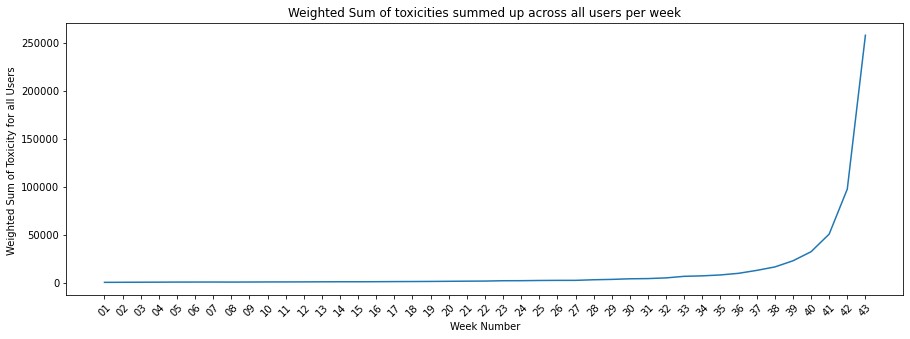

In [13]:
plt.figure(figsize=(15,5))
plt.plot(plot1XAxis[:-1], plot1YAxis[:-1])
plt.xlabel("Week Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Weighted Sum of toxicities summed up across all users per week")
plt.xticks(rotation=45)
plt.show()

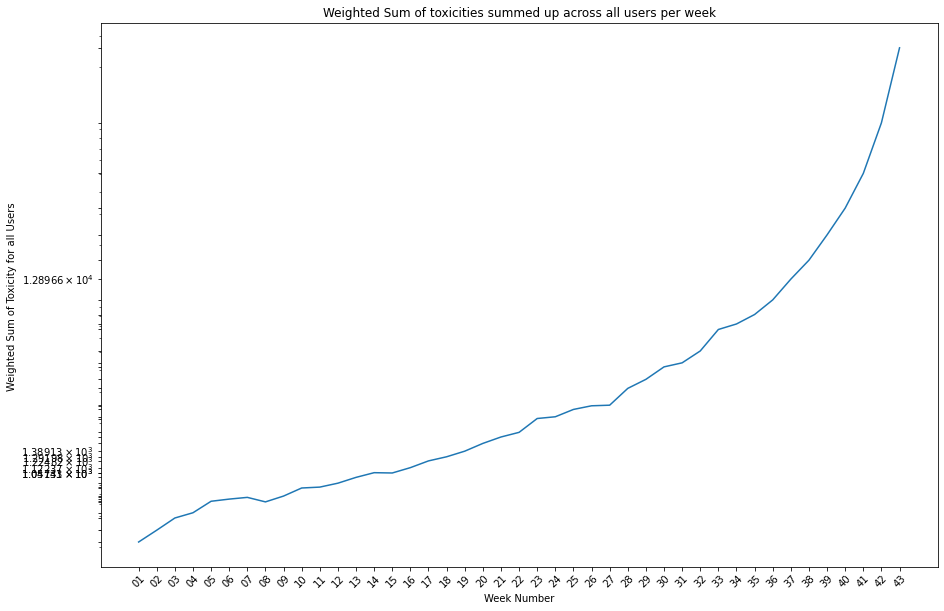

In [14]:
plt.figure(figsize=(15,10))
plt.semilogy(plot1XAxis[:-1], plot1YAxis[:-1])
plt.xlabel("Week Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Weighted Sum of toxicities summed up across all users per week")
plt.xticks(rotation=45)
plt.yticks(plot1YAxis[:-1])
plt.show()

# Plot 2
## Weighted Sum of toxicities summed up across all users per month
xaxis - mnth1 ... mnth10<br>
yaxis - weighted sum

In [15]:
def weightedSumToxicityMonth(monthIn):
    monthDf = groupDf[groupDf['month'] == monthIn]
    monthDf['Toxicity'] = monthDf['Toxicity'] * 10
    monthDf['Toxicity'] = (monthDf['Toxicity'].apply(np.ceil)) / 10
    return monthDf['Toxicity'].sum().round(2)

In [16]:
plot2Arr = []
for i in unique_values_month:
    plot2Arr.append(weightedSumToxicityMonth(i))

In [17]:
plot2XAxis = unique_values_month
plot2YAxis = plot2Arr
# plot2XAxis.astype(int)
# plot2YAxis.astype(int)
# plot2YAxis = np.array(plot2YAxis)
# plot2YAxis = plot2YAxis.astype(int)

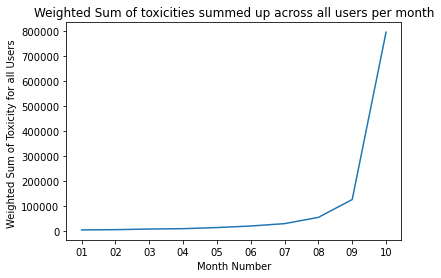

In [18]:
plt.plot(plot2XAxis,plot2YAxis)
plt.xlabel("Month Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Weighted Sum of toxicities summed up across all users per month")
plt.show()

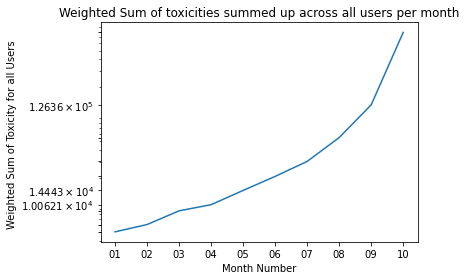

In [19]:
plt.semilogy(plot2XAxis,plot2YAxis)
plt.xlabel("Month Number")
plt.ylabel("Weighted Sum of Toxicity for all Users ")
plt.title("Weighted Sum of toxicities summed up across all users per month")
plt.yticks(plot2YAxis)
plt.gca().set_yticks(plot2YAxis)
# plt.gca().set_yticks(np.linspace(min(plot2YAxis), max(plot2YAxis), 10))
plt.tight_layout()
plt.show()

# Plot 3
## Number of Users Vs Average toxicity per original tweet
make a scatter plot with
xaxis - Avg toxicity
yaxis - number of users
(look at this for all 44 weeks)

In [20]:
groupDf2 = groupDf[(groupDf['qt_flag'] == False) & (groupDf['rt_flag'] == False)]

In [21]:
def countNumberOfUsers(weekIn):
    weekDf3_1 = groupDf2[groupDf2['week'] == weekIn]
    return len(weekDf3_1['user_id'].unique())

In [22]:
def countAvgToxicity(weekIn):
    weekDf3_2 = groupDf2[groupDf2['week'] == weekIn]
    return round(weekDf3_2['Toxicity'].mean(),5)

In [23]:
plot3Arr1 = []
plot3Arr2 = []

In [24]:
for i in unique_values_week:
    plot3Arr1.append(countNumberOfUsers(i))
    plot3Arr2.append(countAvgToxicity(i))

In [25]:
# plot3Arr2

In [26]:
plot3XAxis = plot3Arr2
plot3YAxis = plot3Arr1

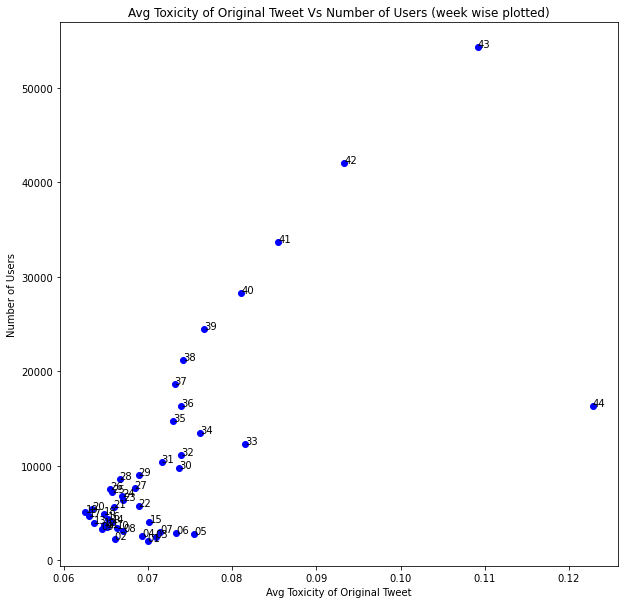

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(plot3XAxis, plot3YAxis, c ="blue")
plt.xlabel("Avg Toxicity of Original Tweet")
plt.ylabel("Number of Users")
plt.title("Avg Toxicity of Original Tweet Vs Number of Users (week wise plotted)")
# plt.yticks(plot3YAxis)
for i, txt in enumerate(unique_values_week):
    plt.annotate(txt, (plot3XAxis[i], plot3YAxis[i]))
plt.show()

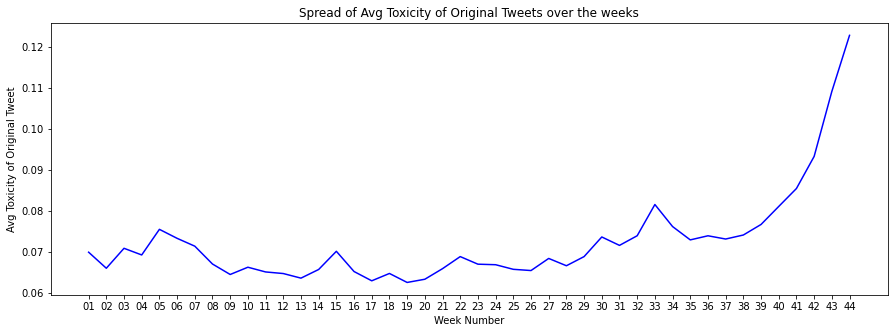

In [28]:
plt.figure(figsize=(15,5))
plt.plot(unique_values_week,plot3XAxis, c ="blue")
plt.xlabel("Week Number")
plt.ylabel("Avg Toxicity of Original Tweet")
plt.title("Spread of Avg Toxicity of Original Tweets over the weeks")
# plt.yticks(plot3YAxis)
plt.show()

# Plot 4
## Number of Users Vs Average toxicity per Retweet
make a scatter plot with
xaxis - Avg toxicity
yaxis - number of users
(look at this for all 44 weeks)

In [29]:
#need to do

# Plot 5
## Number of Users Vs Average toxicity per Retweet
make a scatter plot with
xaxis - Avg toxicity
yaxis - number of users
(look at this for all 44 weeks)

In [30]:
groupDf3 = groupDf[(groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == False)]

In [31]:
def countNumberOfUsers_quoted(weekIn):
    weekDf5_1 = groupDf3[groupDf3['week'] == weekIn]
    return len(weekDf5_1['user_id'].unique())

In [32]:
def countAvgToxicity_quoted(weekIn):
    weekDf5_2 = groupDf3[groupDf3['week'] == weekIn]
    return round(weekDf5_2['Toxicity'].mean(),5)

In [33]:
plot5Arr1 = []
plot5Arr2 = []

In [34]:
for i in unique_values_week:
    plot5Arr1.append(countNumberOfUsers_quoted(i))
    plot5Arr2.append(countAvgToxicity_quoted(i))

In [35]:
# plot5Arr2

In [36]:
plot5XAxis = plot5Arr2
plot5YAxis = plot5Arr1

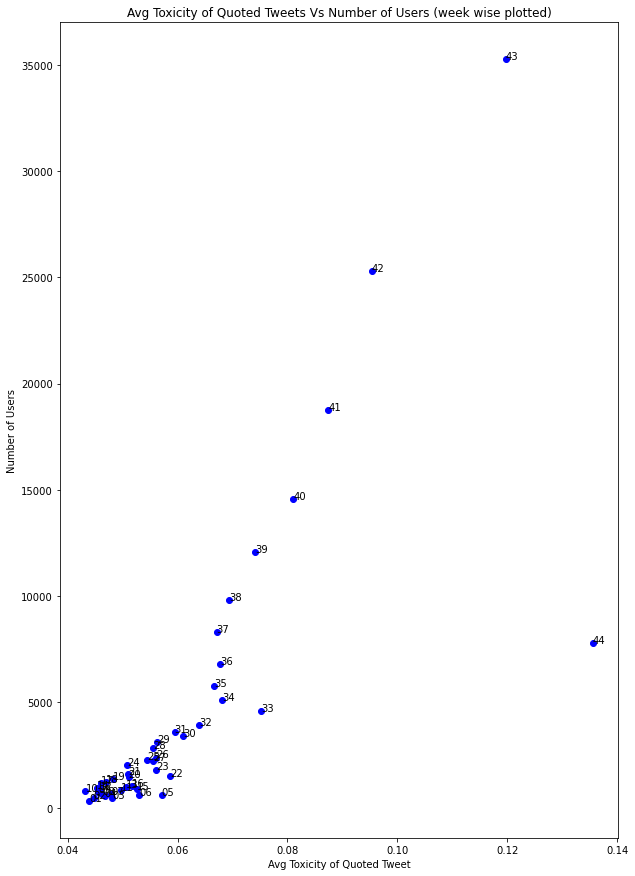

In [37]:
plt.figure(figsize=(10,15))
plt.scatter(plot5XAxis, plot5YAxis, c ="blue")
plt.xlabel("Avg Toxicity of Quoted Tweet")
plt.ylabel("Number of Users")
plt.title("Avg Toxicity of Quoted Tweets Vs Number of Users (week wise plotted)")
# plt.yticks(plot3YAxis)
for i, txt in enumerate(unique_values_week):
    plt.annotate(txt, (plot5XAxis[i], plot5YAxis[i]))
plt.show()

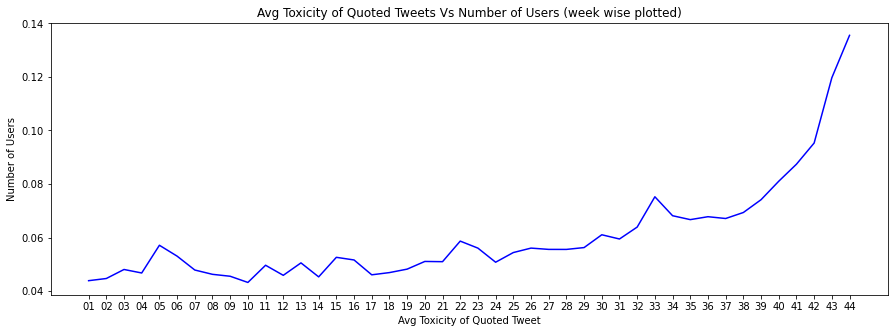

In [38]:
plt.figure(figsize=(15,5))
plt.plot(unique_values_week,plot5XAxis, c ="blue")
plt.xlabel("Avg Toxicity of Quoted Tweet")
plt.ylabel("Number of Users")
plt.title("Avg Toxicity of Quoted Tweets Vs Number of Users (week wise plotted)")
plt.show()

# Plot 6
## Fraction of original tweets : retweets : quotes tweets